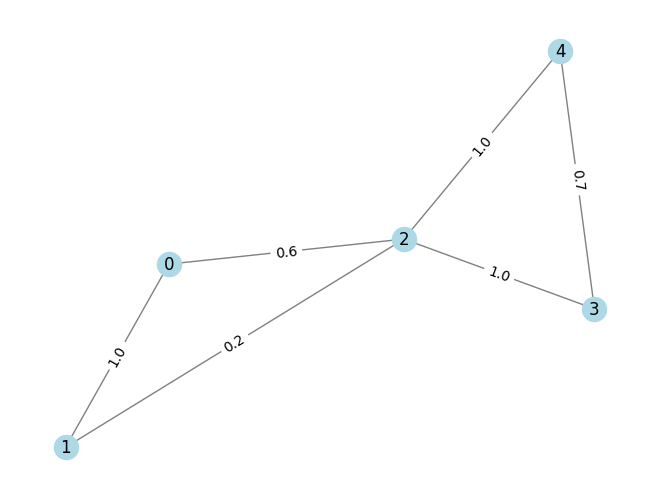

[[0.  1.  0.6 0.  0. ]
 [1.  0.  0.2 0.  0. ]
 [0.6 0.2 0.  1.  1. ]
 [0.  0.  1.  0.  0.7]
 [0.  0.  1.  0.7 0. ]]
Problem name: Max-cut

Maximize
  -2*x_0*x_1 - 1.2*x_0*x_2 - 0.4*x_1*x_2 - 2*x_2*x_3 - 2*x_2*x_4 - 1.4*x_3*x_4
  + 1.6*x_0 + 1.2*x_1 + 2.8*x_2 + 1.7*x_3 + 1.7*x_4

Subject to
  No constraints

  Binary variables (5)
    x_0 x_1 x_2 x_3 x_4

objective function value: 3.6
variable values: x_0=1.0, x_1=0.0, x_2=0.0, x_3=1.0, x_4=1.0
status: SUCCESS


In [1]:
import numpy as np
import utils 
import Qmaxcut
import Cmaxcut
import importlib
importlib.reload(utils)
importlib.reload(Qmaxcut)
importlib.reload(Cmaxcut)

n=np.arange(0, 5, 1)
w_e=[(0, 1, 1.0), (0, 2, 0.6), (1, 2, 0.2), (3, 2, 1.0), (3, 4, 0.7), (4, 2, 1.0)]
G = utils.create_graph(n, w_e)
utils.visualize_graph(G)
prob=utils.encode(G)
utils.classical_max_cut_inbuilt(prob)


In [2]:
qubitOp, offset=Qmaxcut.problemHamiltonian(prob)

paulis = qubitOp.paulis  # This gives the list of Pauli strings
    
    # Access coefficients
coeffs = qubitOp.coeffs  # This gives the array of coefficients


Offset: -2.25
Ising Hamiltonian:
SparsePauliOp(['IIIIZ', 'IIIZI', 'IIZII', 'IIIZZ', 'IIZIZ', 'IIZZI', 'IZZII', 'ZIZII', 'ZZIII'],
              coeffs=[ 5.55111512e-17+0.j, -2.77555756e-17+0.j, -1.11022302e-16+0.j,
  5.00000000e-01+0.j,  3.00000000e-01+0.j,  1.00000000e-01+0.j,
  5.00000000e-01+0.j,  5.00000000e-01+0.j,  3.50000000e-01+0.j])


In [3]:
H_cost = Cmaxcut.problemHamiltonian(prob)
H_walk = Cmaxcut.hypercubeHamiltonian(5)
print(f"H_cost shape: {H_cost.shape}, Dimensions: {H_cost.ndim}")
print(f"H_walk shape: {H_walk.shape}, Dimensions: {H_walk.ndim}")
initial_state = Cmaxcut.initialState(5)
print(f"initial_state shape: {initial_state.shape}, Dimensions: {initial_state.ndim}")
t = [0.1,0.2,0.3]
gamma = [0.1,0.2,0.3]
Cmaxcut.QW(H_cost, H_walk, t, initial_state, gamma, 3)


Offset: -2.25
Ising Hamiltonian:
SparsePauliOp(['IIIIZ', 'IIIZI', 'IIZII', 'IIIZZ', 'IIZIZ', 'IIZZI', 'IZZII', 'ZIZII', 'ZZIII'],
              coeffs=[ 5.55111512e-17+0.j, -2.77555756e-17+0.j, -1.11022302e-16+0.j,
  5.00000000e-01+0.j,  3.00000000e-01+0.j,  1.00000000e-01+0.j,
  5.00000000e-01+0.j,  5.00000000e-01+0.j,  3.50000000e-01+0.j])
H_cost shape: (32, 32), Dimensions: 2
H_walk shape: (32, 32), Dimensions: 2
initial_state shape: (32,), Dimensions: 1


(array([-0.10491638+0.00854192j, -0.1470493 -0.01495375j,
        -0.13531014-0.00746185j, -0.12891445+0.00139904j,
        -0.18369737-0.04616049j, -0.1990647 -0.05850317j,
        -0.20700315-0.07459337j, -0.16247553-0.02208408j,
        -0.15278544-0.01596896j, -0.20037351-0.06247099j,
        -0.18968386-0.04815404j, -0.17809729-0.03553676j,
        -0.17809729-0.03553676j, -0.18968386-0.04815404j,
        -0.20037351-0.06247099j, -0.15278544-0.01596896j,
        -0.15278544-0.01596896j, -0.20037351-0.06247099j,
        -0.18968386-0.04815404j, -0.17809729-0.03553676j,
        -0.17809729-0.03553676j, -0.18968386-0.04815404j,
        -0.20037351-0.06247099j, -0.15278544-0.01596896j,
        -0.16247553-0.02208408j, -0.20700315-0.07459337j,
        -0.1990647 -0.05850317j, -0.18369737-0.04616049j,
        -0.12891445+0.00139904j, -0.13531014-0.00746185j,
        -0.1470493 -0.01495375j, -0.10491638+0.00854192j]),
 array([-2.26533896, -2.43046158, -2.92832948]))